# Life Expectancy and GDP Project

In this project, we will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

We will start with preparing the data, importing the necessary libraries and putting the data into a pandas dataframe

#### 1 - Importing the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

all_data = pd.read_csv('all_data.csv')

In [4]:
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


The data seems to have been imported correctly

Now we will do some exploratory data analysis as well as some cleaning

#### 2 - Exploratory Data Analysis

In [5]:
print(all_data.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


We have 4 columns, but the third column's name is too long, let's make it shorter

In [6]:
all_data = all_data.rename({"Life expectancy at birth (years)":"Life_expectancy"}, axis = "columns")
print(all_data.columns)

Index(['Country', 'Year', 'Life_expectancy', 'GDP'], dtype='object')


It's much better now, we will move into the EDA

In [7]:
print(all_data.shape)

(96, 4)


We have 4 columns and 96 rows

In [8]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There appears to be no missing data, also the values seems to be in the logical data types, we can proceed with the analysis

Let's check the countries that we have in our dataset and their count

In [9]:
print(all_data['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [10]:
print(all_data['Country'].value_counts())

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


we have 6 countries and the count is similair for all of them, it's a well balanced dataset

In [11]:
print(all_data['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


This Dataset goes from the year 2000 to 2015

Now let's check the distrubution of the life expectancy at birth

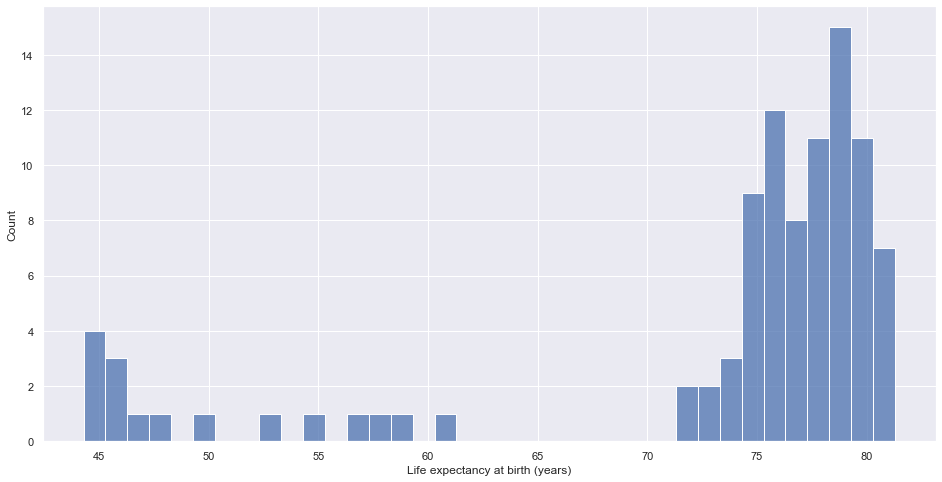

<Figure size 432x288 with 0 Axes>

In [25]:
sns.set_theme()
plt.figure(figsize=(16, 8))
sns.histplot(data=all_data, x="Life_expectancy", binwidth=1)
plt.xlabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

The distribution is heavily left skewed as the majority of the values are on the right, we will next plot for the life expectancy at birth for each country seperatly

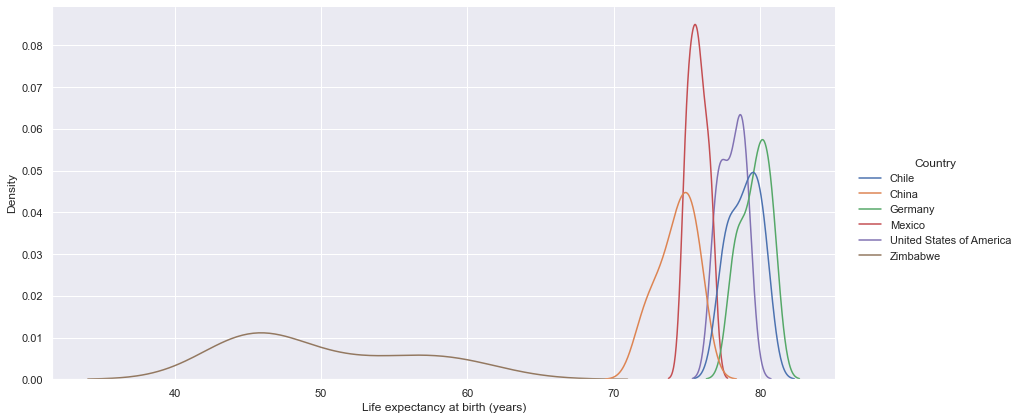

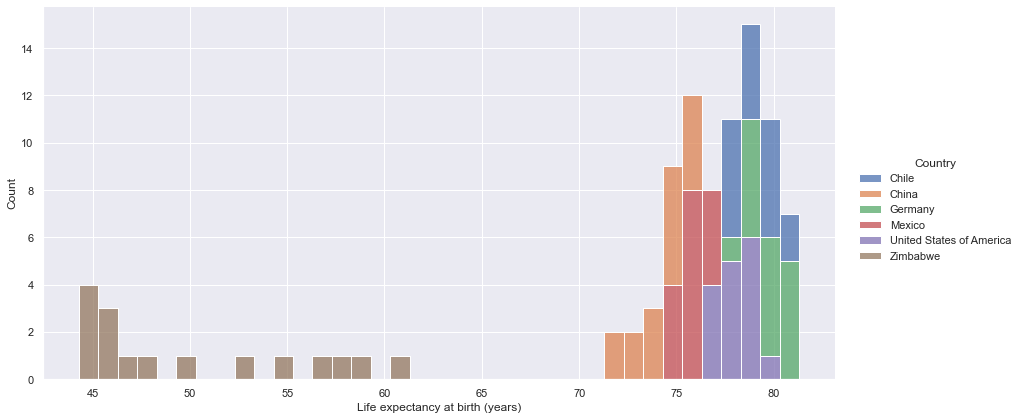

<Figure size 432x288 with 0 Axes>

In [26]:
sns.set_theme()
sns.displot(data=all_data, x="Life_expectancy", hue="Country", kind="kde", height=6, aspect=2)
plt.xlabel("Life expectancy at birth (years)")
sns.displot(data=all_data, x="Life_expectancy", hue="Country", multiple="stack", binwidth=1, height=6, aspect=2)
plt.xlabel("Life expectancy at birth (years)")
plt.show()
plt.clf()

As we can see from these 2 graphs, most of the data is on the right, that's 5 countries, except Zimbabwe where the data concerning this country is the one in the left, and it's what's making the distribution left skewed

Now let's check the distribution of the GPD

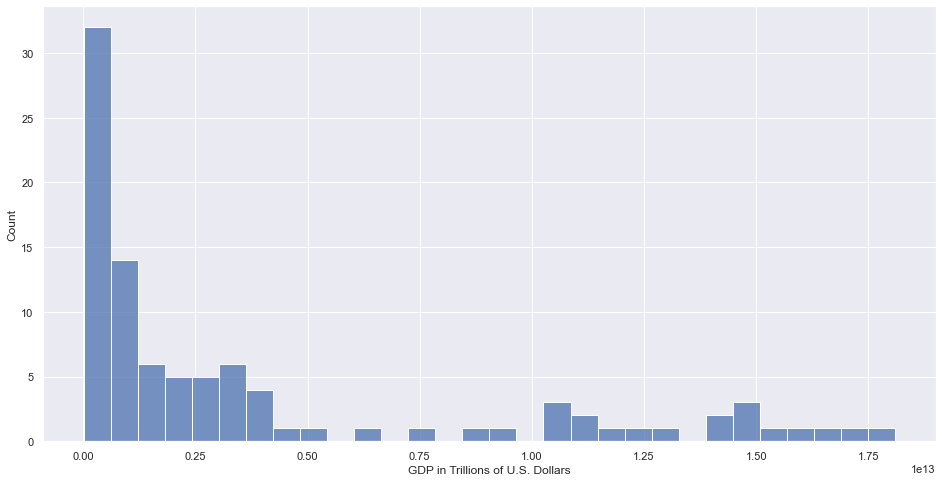

<Figure size 432x288 with 0 Axes>

In [27]:
sns.set_theme()
plt.figure(figsize=(16, 8))
sns.histplot(data=all_data, x="GDP", bins=30)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

Now this time the data is right skewed because most of it is on the left with outliers on the right

Let's seperate it by country

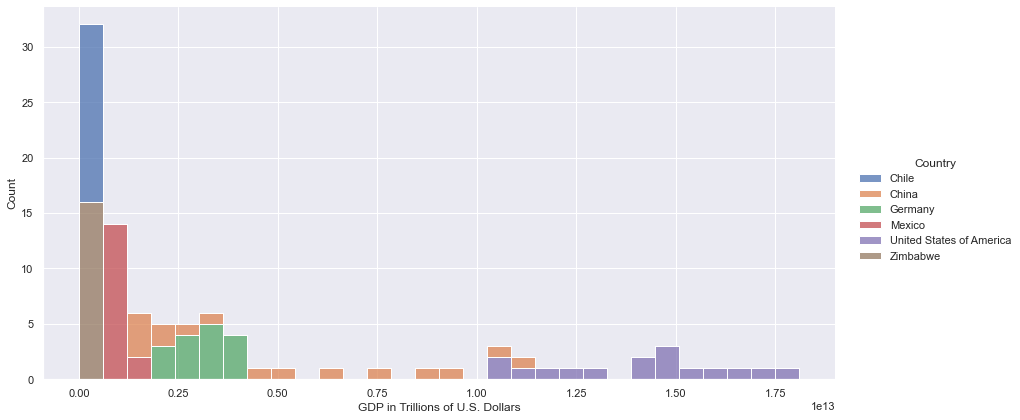

<Figure size 432x288 with 0 Axes>

In [24]:
sns.set_theme()
sns.displot(data=all_data, x="GDP", hue="Country", multiple="stack", bins=30, height=6, aspect=2)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

the GDP distribution of most countries is on the left except for China being also on the right, and the United states being on the far right making the distrubution right skewed

#### 3 - More Analysis

Now after the EDA, let's dive deeper into the analysis and answer the questions asked in the beginning

let's start with :
+ Has life expectancy increased over time in the six nations?

To answer that question, we need to make some plots

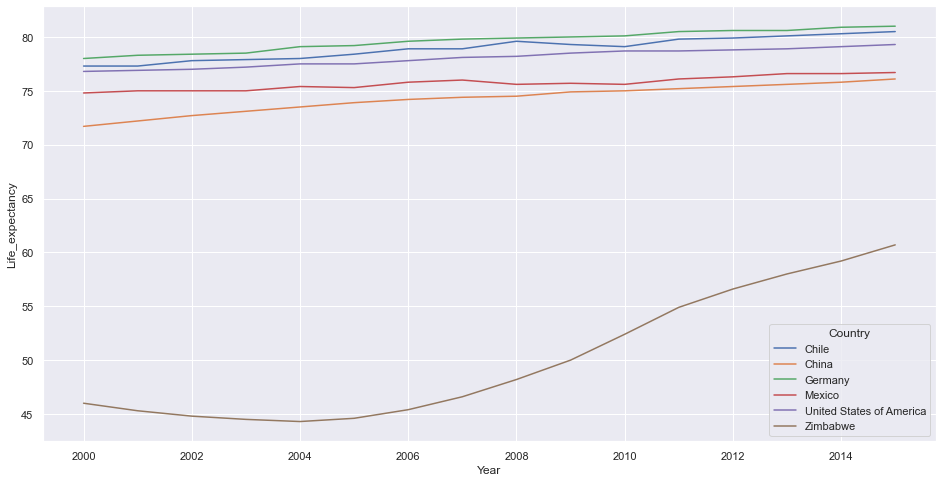

<Figure size 432x288 with 0 Axes>

In [62]:
sns.set_theme()
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='Life_expectancy', hue='Country', data=all_data)
plt.show()
plt.clf()

Zimbabwe's life expectancy increased a lot compared to the other countries, let's a closer look into each country

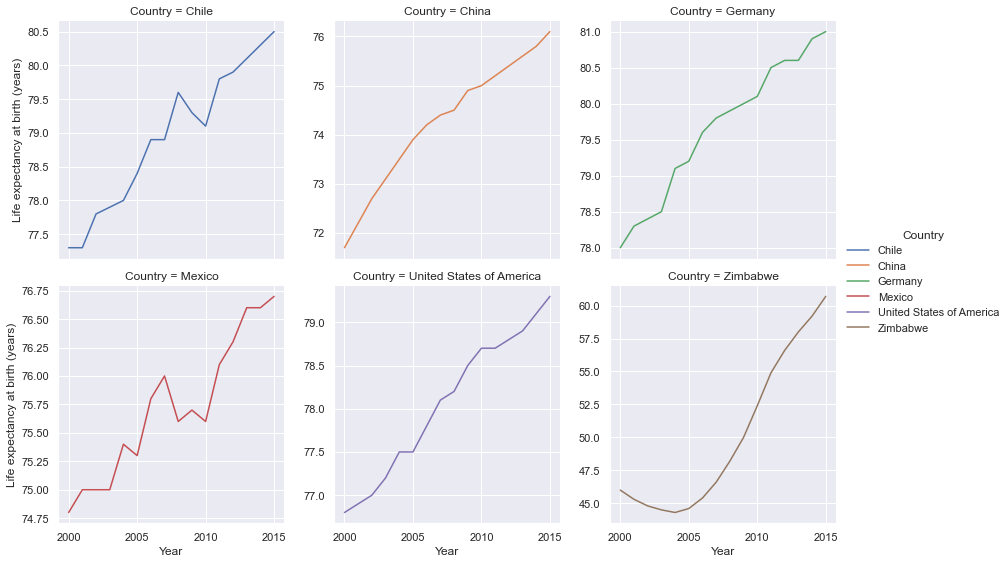

<Figure size 432x288 with 0 Axes>

In [59]:
sns.set_theme()
g = sns.FacetGrid(all_data, col="Country", col_wrap=3, sharey = False, hue = "Country", height=4, aspect=1)
g = (g.map(sns.lineplot,"Year","Life_expectancy") .add_legend() .set_axis_labels("Year","Life expectancy at birth (years)"))
plt.show()
plt.clf()

We can see that the the life expectancy of all countries increased up with time

Now let's answer this question :
+ Has GDP increased over time in the six nations?

Again we need to plot some graphs to be able to answer

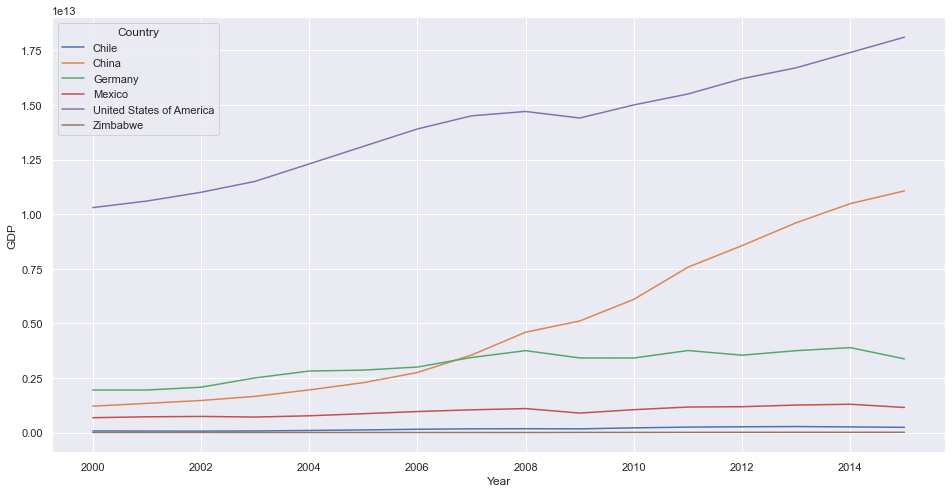

<Figure size 432x288 with 0 Axes>

In [63]:
sns.set_theme()
plt.figure(figsize=(16, 8))
sns.lineplot(x='Year', y='GDP', hue='Country', data=all_data)
plt.show()
plt.clf()

It seems that the GPD of the united states and especially China is increasing a lot with time, we need to analyse the countries sperately to have a better idea

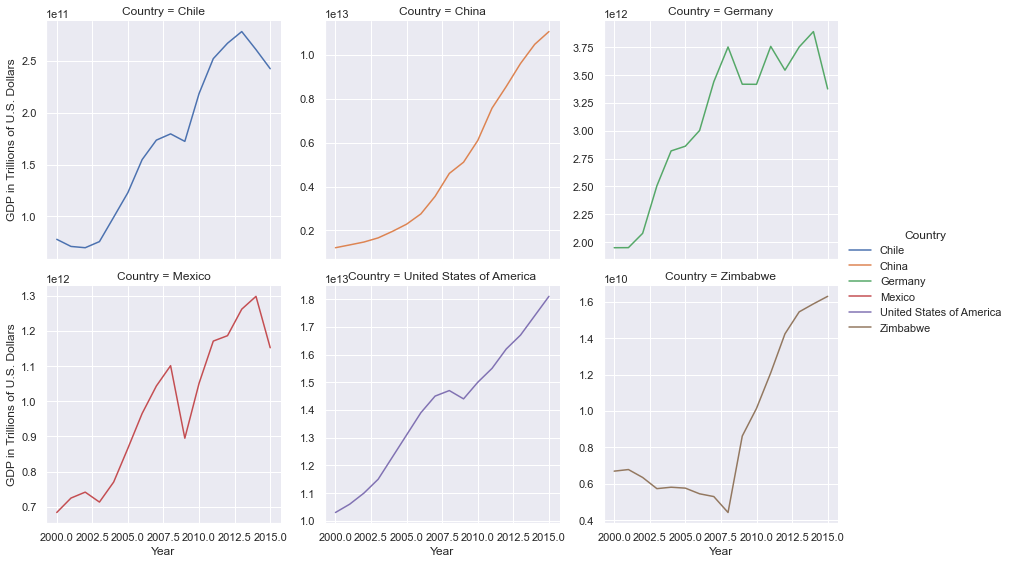

<Figure size 432x288 with 0 Axes>

In [66]:
sns.set_theme()
g = sns.FacetGrid(all_data, col="Country", col_wrap=3, sharey = False, hue = "Country", height=4, aspect=1)
g = (g.map(sns.lineplot,"Year","GDP") .add_legend() .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
plt.show()
plt.clf()

The GPD of all countries has increased over time

Now onto the next question:
+ Is there a correlation between GDP and life expectancy of a country?

We need to plot a scatterplot to check if there is a correlation between the GDP and life expectancy of a country

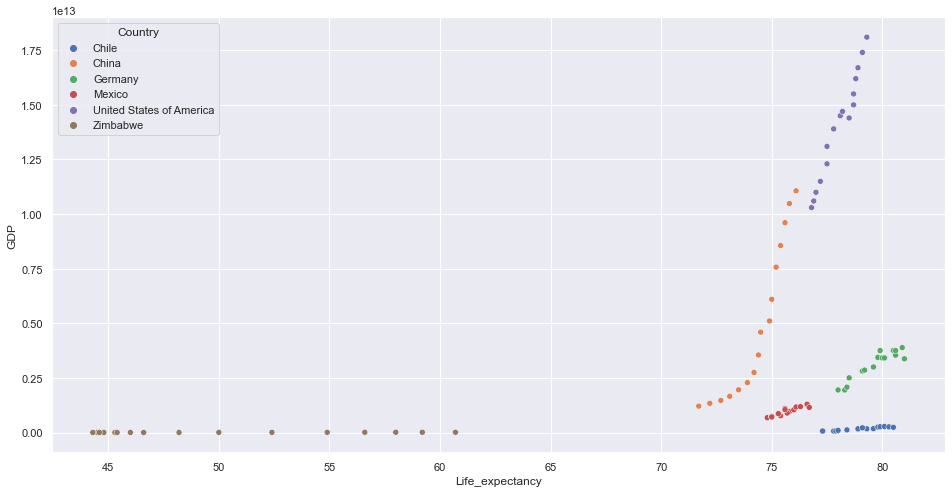

<Figure size 432x288 with 0 Axes>

In [72]:
sns.set_theme()
plt.figure(figsize=(16, 8))
sns.scatterplot(data=all_data, x="Life_expectancy", y="GDP", hue='Country')
plt.show()
plt.clf()

Now let's plot a scatterplot for each country to have a better idea

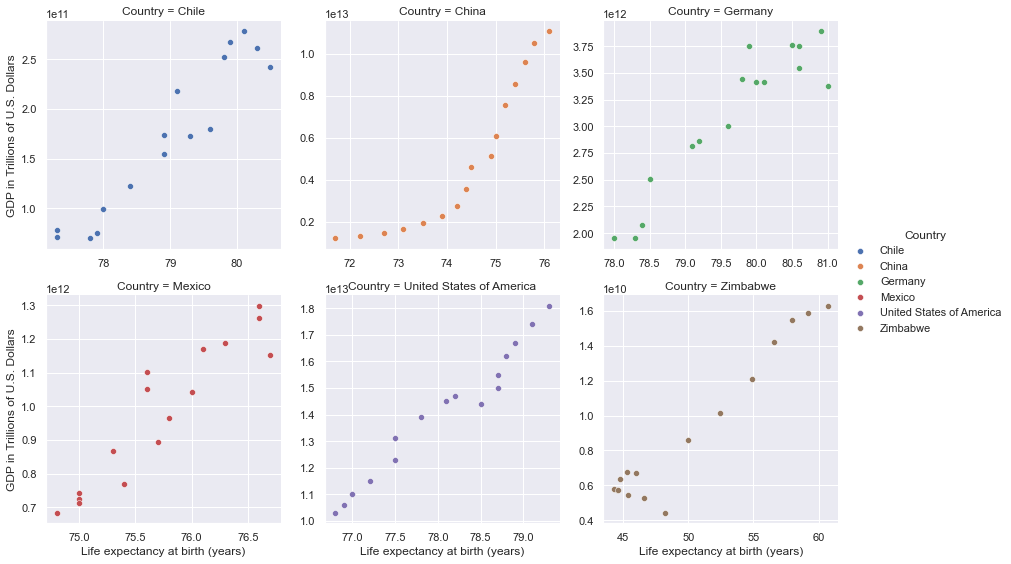

<Figure size 432x288 with 0 Axes>

In [75]:
sns.set_theme()
g = sns.FacetGrid(all_data, col="Country", col_wrap=3, hue = "Country", sharey = False, sharex = False, height=4, aspect=1)
g = (g.map(sns.scatterplot,"Life_expectancy","GDP") .add_legend() .set_axis_labels("Life expectancy at birth (years)","GDP in Trillions of U.S. Dollars"))
plt.show()
plt.clf()

We can see that the countries have linear relationships between the GPD and the life expectancy, so they have a positive correlation

Now let's answer this question:
+ What is the average life expectancy in these nations?

We will calculate it and make a plot to help us see it better

In [76]:
print(all_data.groupby('Country').Life_expectancy.mean())

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_expectancy, dtype: float64


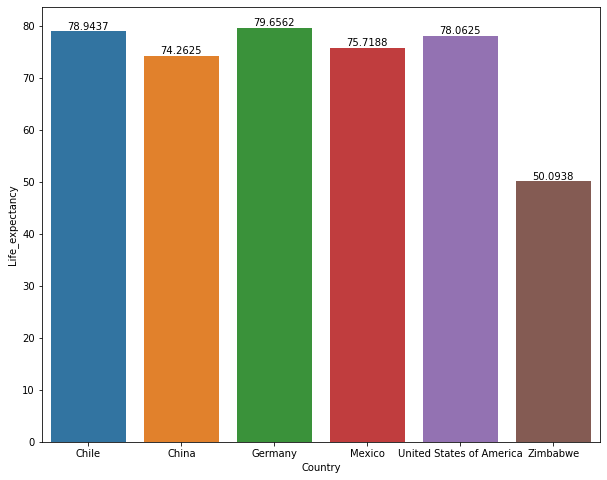

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(data=all_data, x="Country", y="Life_expectancy", ci=None)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The average life expactancy of the countries is in the high 70s except for Zimbabwe which is in the 50s

Now the final question:
+ What is the distribution of that life expectancy?

Which we already answered earlier in the exploratory data analysis, the data was mostly on the right sad while having a left skew due to due to Zimbabwe's lower average life exectancy

#### 4 - Conclusion

We imported the data, cleaned it, did some exploratory data analysis and did an even deeper analysis while answering the questions required

The life expectancy distribution was mostly on the the right but had a left skew, while the GPD distibution was on the left while having a right skew

The life expectancy over time increased for all countries with Zimbabwe having the biggest increase, the same for the GDP increasing over time with China having the greatest increase

The countries have a linear relationship between the GDP and the life expectancy at birth thus exhibiting a positive correlation

And finally, the life expectancy average per country was in the high 70s except for Zimbabwe being in the 50s